In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing all the neccessary libraries

import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
import plotly  #  interactive plotting library 

In [ ]:
# Loading the dataset into the pandas dataframe (cleaned dataset)

df = pd.read_csv("/content/whole_new_new.csv",encoding = "latin1")
#df = df.drop("index",axis=1) # I droped the 'index' column because I don't need it.
df=df.dropna()

#初始EDA

In [ ]:
# Display the first few rows of the dataframe.
df.head(2)

,Job Title,Job Title final,Salary Estimate,Salary_Estimate_low,Salary_Estimate_high,Salary_Estimate_average,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",Data Analyst,37K-66K (Glassdoor est.),37,66.0,51.5,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,100 to 500 million (USD),-1,TRUE
1,Quality Data Analyst,Data Analyst,37K-66K (Glassdoor est.),37,66.0,51.5,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,2 to 5 billion (USD),-1,-1


In [ ]:
# Lets look at the shape of the dataset

print("No. of rows in the dataset:",df.shape[0])
print("No. of columns in the dataset:",df.shape[1])

No. of rows in the dataset: 15678
No. of columns in the dataset: 19


In [ ]:
# Scanning the dataset for missing values.

df.isnull().sum()

Job Title                  0
Job Title final            0
Salary Estimate            0
Salary_Estimate_low        0
Salary_Estimate_high       0
Salary_Estimate_average    0
Job Description            0
Rating                     0
Company Name               0
Location                   0
Headquarters               0
Size                       0
Founded                    0
Type of ownership          0
Industry                   0
Sector                     0
Revenue                    0
Competitors                0
Easy Apply                 0
dtype: int64

In [ ]:
def get_missing_values(c_df):
    
    values = c_df.isnull().sum()
    percentage = 100 * c_df.isnull().sum() / len(c_df)
    table = pd.concat([values, percentage.round(2)], axis=1)
    table.columns = ['No of missing values', '% of missing values']
    
    return table[table['No of missing values'] != 0].sort_values('% of missing values', ascending = False).style.background_gradient('Greens')

In [ ]:
get_missing_values(df)

,No of missing values,% of missing values


In [ ]:
# Looking at some overall information and statistics about the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15678 entries, 0 to 15725
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                15678 non-null  object 
 1   Job Title final          15678 non-null  object 
 2   Salary Estimate          15678 non-null  object 
 3   Salary_Estimate_low      15678 non-null  int64  
 4   Salary_Estimate_high     15678 non-null  float64
 5   Salary_Estimate_average  15678 non-null  float64
 6   Job Description          15678 non-null  object 
 7   Rating                   15678 non-null  float64
 8   Company Name             15678 non-null  object 
 9   Location                 15678 non-null  object 
 10  Headquarters             15678 non-null  object 
 11  Size                     15678 non-null  object 
 12  Founded                  15678 non-null  int64  
 13  Type of ownership        15678 non-null  object 
 14  Industry              

In [ ]:

# convert data type of xxx 
# into integer
df['Salary_Estimate_low'] = pd.to_numeric(df['Salary_Estimate_low'],errors = 'coerce')
df['Salary_Estimate_high'] = pd.to_numeric(df['Salary_Estimate_high'],errors = 'coerce')
df['Salary_Estimate_average'] = pd.to_numeric(df['Salary_Estimate_average'],errors = 'coerce') 
# show the datatypes
print(df.dtypes)

Job Title                   object
Job Title final             object
Salary Estimate             object
Salary_Estimate_low          int64
Salary_Estimate_high       float64
Salary_Estimate_average    float64
Job Description             object
Rating                     float64
Company Name                object
Location                    object
Headquarters                object
Size                        object
Founded                      int64
Type of ownership           object
Industry                    object
Sector                      object
Revenue                     object
Competitors                 object
Easy Apply                  object
dtype: object


In [ ]:
# Provide a summary of the numerical information...

df.describe()

,Salary_Estimate_low,Salary_Estimate_high,Salary_Estimate_average,Rating,Founded
count,15678.000000,15678.000000,15678.000000,15678.000000,15678.000000
mean,65.301442,108.929583,87.115512,3.296460,1459.047519
std,28.189898,40.229125,33.222602,1.549465,870.468332
min,12.000000,37.000000,33.000000,-1.000000,-1.000000
25%,44.000000,80.000000,62.000000,3.200000,-1.000000
50%,57.000000,100.000000,79.000000,3.700000,1981.000000
75%,81.000000,132.000000,106.000000,4.100000,2002.000000
max,200.000000,281.000000,225.000000,5.000000,2020.000000


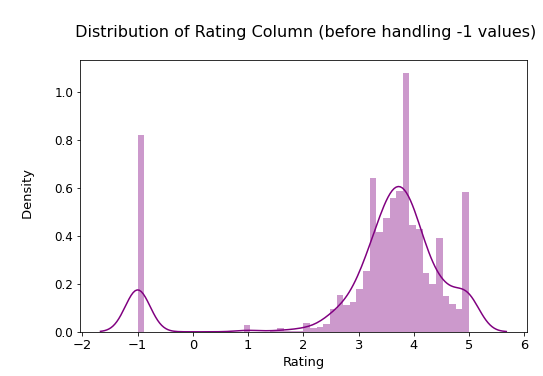

In [ ]:
# Lets look at how the 'Rating' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Rating Column (before handling -1 values)\n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.Rating,color="purple")
plt.show()

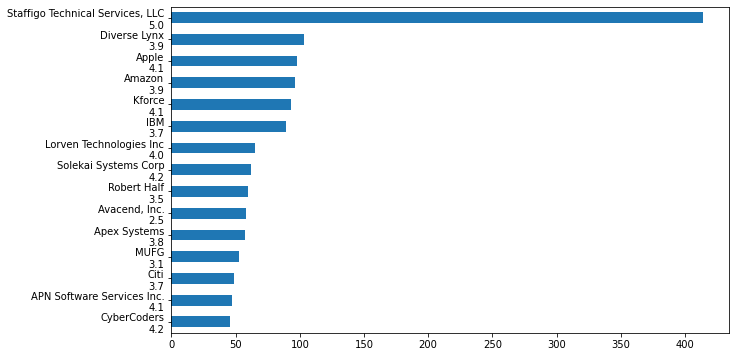

In [ ]:
df['Company Name'].value_counts().head(15).sort_values().plot.barh(figsize = (10,6))

In [ ]:
# How many companies are here

import seaborn as sns
import matplotlib.pyplot as plt


def show_simple_bar_plot(col):

    ax = sns.barplot(
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

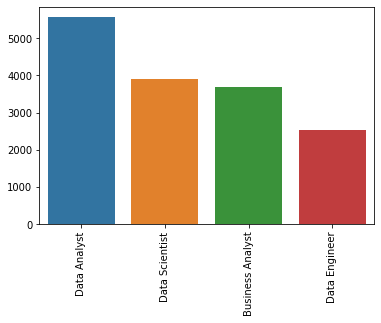

In [ ]:
show_simple_bar_plot('Job Title final')

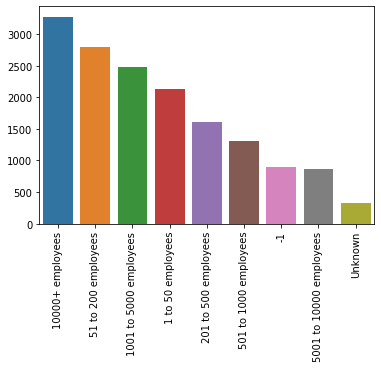

In [ ]:
show_simple_bar_plot('Size')

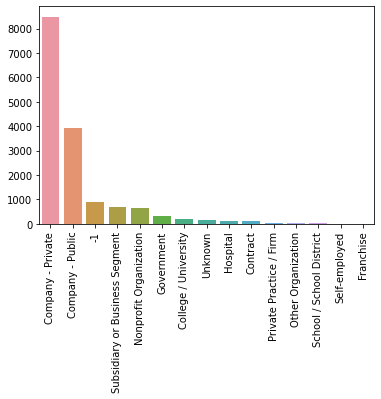

In [ ]:
show_simple_bar_plot('Type of ownership')

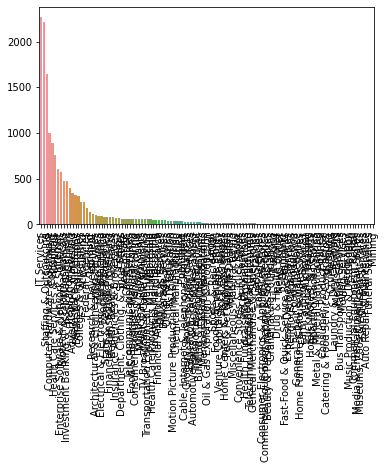

In [ ]:
show_simple_bar_plot('Industry')

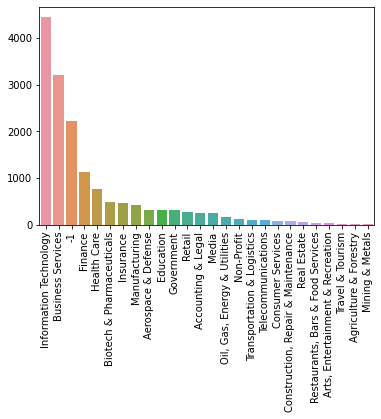

In [ ]:
show_simple_bar_plot('Sector')

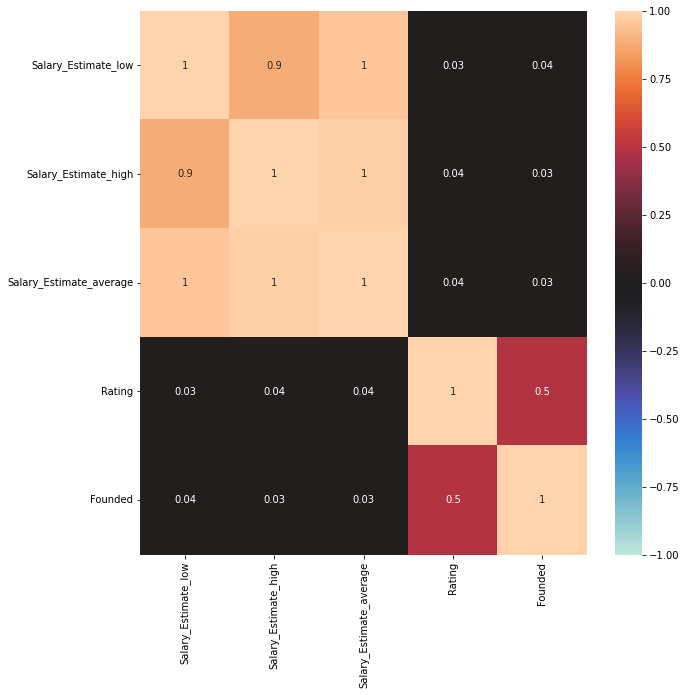

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,10)) 
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,  ax=ax)

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
  >>> import nltk
  >>> nltk.download('stopwords')
  >>> nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#6666666666666666666666666666666666666666666666666666666666666666666666666
# words = " ".join(df['Job Description'])

# def punctuation_stop(text):
#     """remove punctuation and stop words"""
#     filtered = []
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
#     for w in word_tokens:
#         if w not in stop_words and w.isalpha():
#             filtered.append(w.lower())
#     return filtered


# words_filtered = punctuation_stop(words)

# text = " ".join([ele for ele in words_filtered])

# wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1200, height = 1500)
# wc.generate(text)

# plt.figure(figsize=[10,10])
# plt.imshow(wc,interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [ ]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = df.groupby("Location")["Salary_Estimate_average"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Location":"Location","Salary_Estimate_average":"Average Salary"})

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib
from matplotlib import rcParams

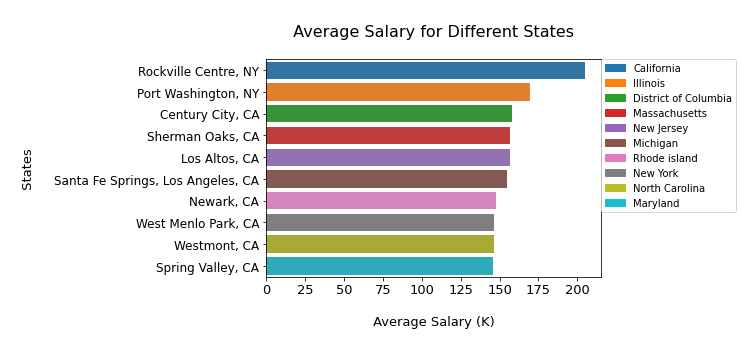

In [ ]:
# Plotting the average salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Location", x = "Average Salary",data=g)

#Beautifying the plot

plt.title('\n Average Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

说明有outlier

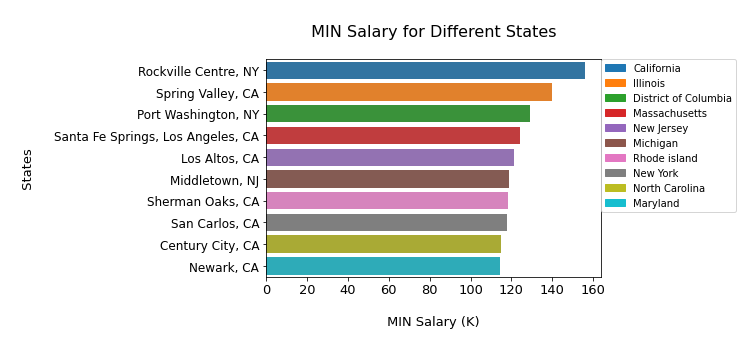

In [ ]:
#Making a DF of min Salary of top 10 states in which job postings was maximum.

g = df.groupby("Location")["Salary_Estimate_low"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Location":"Location","Salary_Estimate_low":"MIN Salary"})

# Plotting the MIN salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Location", x = "MIN Salary",data=g)

#Beautifying the plot

plt.title('\n MIN Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n MIN Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

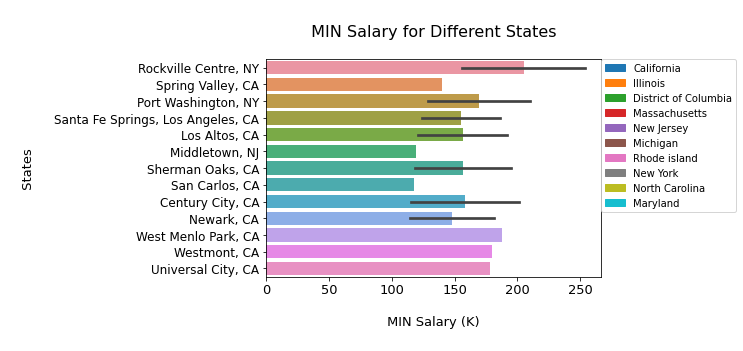

In [ ]:
#Making a DF of min Salary of top 10 states in which job postings was maximum.

g1 = df.groupby("Location")["Salary_Estimate_low"].mean().sort_values(ascending=False)[0:10]
g1 = g1.reset_index().rename(columns={"Location":"Location","Salary_Estimate_low":"Salary"})
g2 = df.groupby("Location")["Salary_Estimate_high"].mean().sort_values(ascending=False)[0:10]
g2 = g2.reset_index().rename(columns={"Location":"Location","Salary_Estimate_high":"Salary"})
concatenated = pd.concat([g1.assign(dataset='g1'), g2.assign(dataset='g2')])

# Plotting the MIN salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Location", x = "Salary",data=concatenated)

#Beautifying the plot

plt.title('\n MIN Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n MIN Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
concatenated

,Location,Salary,dataset
0,"Rockville Centre, NY",156.000000,g1
1,"Spring Valley, CA",140.000000,g1
2,"Port Washington, NY",129.000000,g1
3,"Santa Fe Springs, Los Angeles, CA",124.000000,g1
4,"Los Altos, CA",121.000000,g1
5,"Middletown, NJ",119.000000,g1
6,"Sherman Oaks, CA",118.250000,g1
7,"San Carlos, CA",117.750000,g1
8,"Century City, CA",115.000000,g1
9,"Newark, CA",114.181818,g1


THIS ONE GOOD

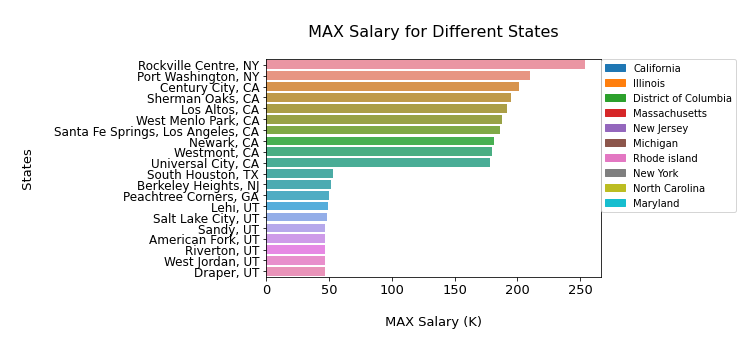

In [ ]:
#Making a DF of MAX Salary of top 10 states in which job postings was maximum.

g = df.groupby("Location")["Salary_Estimate_high"].mean().sort_values(ascending=False).iloc[[*range(10), *range(-10, 0)]]
g = g.reset_index().rename(columns={"Location":"Location","Salary_Estimate_high":"MAX Salary"})

# Plotting the MAX salary per annum for different states.
lab=["California","Illinois","District of Columbia","Massachusetts","New Jersey","Michigan","Rhode island","New York","North Carolina","Maryland"]

sns.barplot(y="Location", x = "MAX Salary",data=g)

#Beautifying the plot

plt.title('\n MAX Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n MAX Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#Salary of Job Titles with Most Number of Jobs:

In [ ]:
salary=["Salary_Estimate_average"]

In [ ]:
df.groupby("Job Title final")[salary].mean().sort_values("Salary_Estimate_average",ascending=False)

,Salary_Estimate_average
Job Title final,
Data Scientist,108.295910
Data Engineer,100.800435
Business Analyst,77.611863
Data Analyst,72.419390


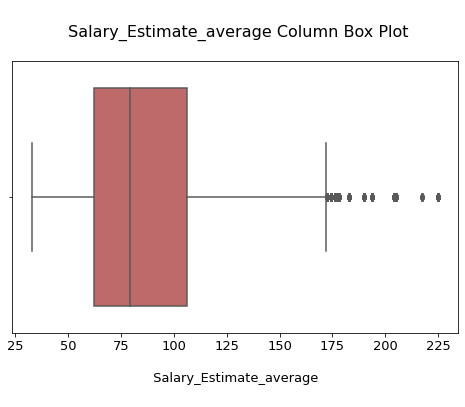

In [ ]:
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(df.Salary_Estimate_average,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
salary_min=["Salary_Estimate_low"]
df.groupby("Job Title final")[salary_min].mean().sort_values("Salary_Estimate_low",ascending=False)

,Salary_Estimate_low
Job Title final,
Data Scientist,82.235854
Data Engineer,77.195807
Business Analyst,56.243499
Data Analyst,54.086355


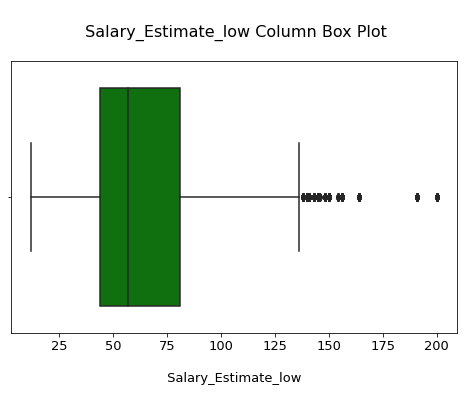

In [ ]:
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(df.Salary_Estimate_low,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
salary_max=["Salary_Estimate_high"]
df.groupby("Job Title final")[salary_max].mean().sort_values("Salary_Estimate_high",ascending=False)

,Salary_Estimate_high
Job Title final,
Data Scientist,134.355967
Data Engineer,124.405063
Business Analyst,98.980228
Data Analyst,90.752424


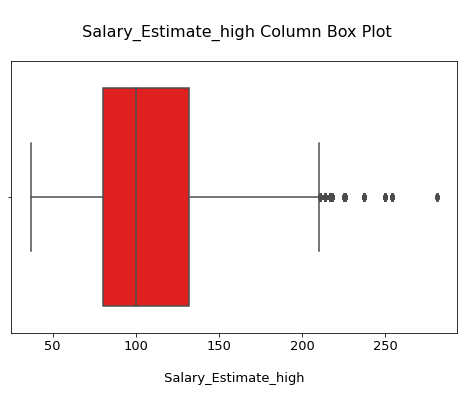

In [ ]:
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(df.Salary_Estimate_high,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
#Understanding Founded column
df['Founded'].drop_duplicates().nsmallest(10)

11         -1
5064     1625
4850     1668
2023     1682
12076    1690
1845     1698
3877     1706
14130    1718
1088     1740
5068     1766
Name: Founded, dtype: int64

In [ ]:
# New company
df['Founded'].drop_duplicates().nlargest(10)

2719    2020
592     2019
36      2018
27      2017
14      2016
53      2015
5       2014
9       2013
100     2012
26      2011
Name: Founded, dtype: int64

#离散salary eda part

In [ ]:
df_da=df[df['Job Title final'].str.contains('Data Analyst')]
df_de=df[df['Job Title final'].str.contains('Data Engineer')]
df_ba=df[df['Job Title final'].str.contains('Business Analyst')]
df_ds=df[df['Job Title final'].str.contains('Data Scientist')]



去除outlier https://blog.51cto.com/u_15057820/4543154

In [ ]:
df_da.to_csv("df_da_new")
df_de.to_csv("df_de_new")
df_ba.to_csv("df_ba_new")
df_ds.to_csv("df_ds_new")

##Data Analyst part

In [ ]:
salary_min=["Salary_Estimate_low"]
df_da.groupby("Job Title final")[salary_min].mean().sort_values("Salary_Estimate_low",ascending=False)

,Salary_Estimate_low
Job Title final,
Data Analyst,54.086355


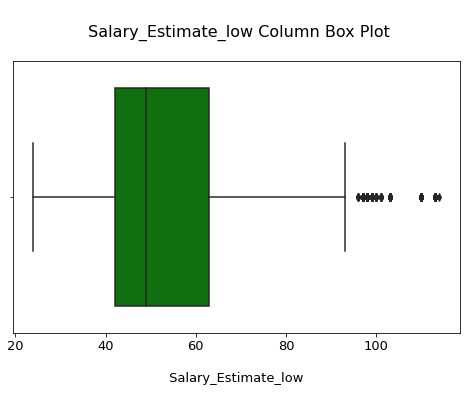

In [ ]:
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_da.Salary_Estimate_low,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_da.Salary_Estimate_low,0.25)
q3=np.quantile(df_da.Salary_Estimate_low,0.75)
q2=np.median(df_da.Salary_Estimate_low)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3


(42.0, 49.0, 63.0)

上边缘： 93.0
下边缘： 24.0
非异常范围： [24.0, 93.0]
异常值（离散值）： 369      98
370      98
371      98
372      98
373      98
       ... 
5185    100
5186    100
5187    100
5188    100
5189    100
Name: Salary_Estimate_low, Length: 222, dtype: int64


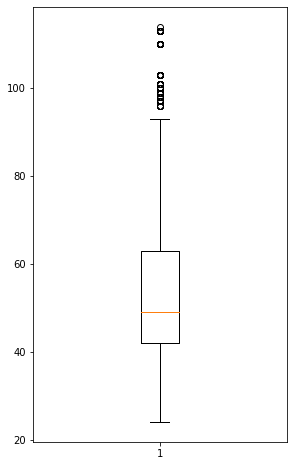

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_da.Salary_Estimate_low)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_da.Salary_Estimate_low[(df_da.Salary_Estimate_low < lower_whisker) | (df_da.Salary_Estimate_low > upper_whisker)]
print("异常值（离散值）：", outlier)

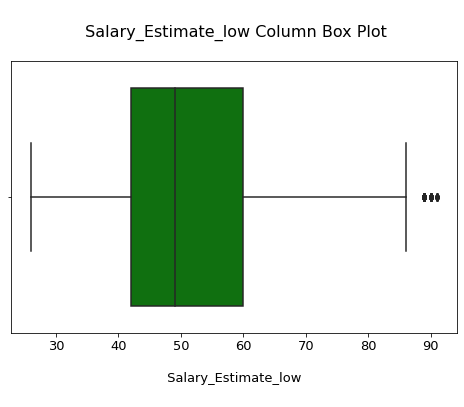

In [ ]:
##### 删除异常值 ######
not_outlier = df_da.Salary_Estimate_low[(df_da.Salary_Estimate_low > lower_whisker) & (df_da.Salary_Estimate_low < upper_whisker)]
not_outlier_low_da=not_outlier
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_low_da,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
salary_max=["Salary_Estimate_high"]
df_da.groupby("Job Title final")[salary_max].mean().sort_values("Salary_Estimate_high",ascending=False)

,Salary_Estimate_high
Job Title final,
Data Analyst,90.752424


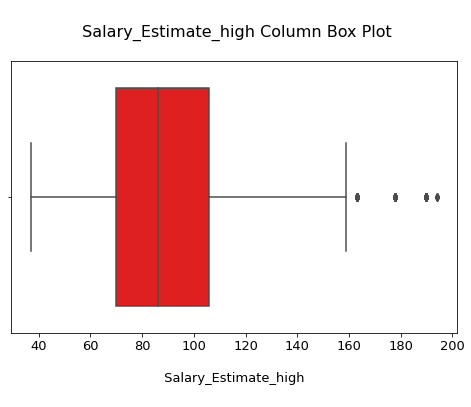

In [ ]:
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_da.Salary_Estimate_high,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 159.0
下边缘： 37.0
非异常范围： [37.0, 159.0]
异常值（离散值）： 1468    190.0
1469    190.0
1470    190.0
1471    190.0
1472    190.0
        ...  
3817    163.0
4435    178.0
4436    178.0
4437    178.0
4438    178.0
Name: Salary_Estimate_high, Length: 102, dtype: float64


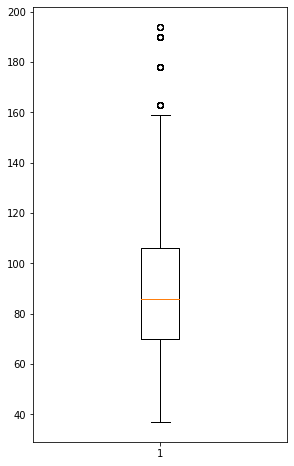

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_da.Salary_Estimate_high)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_da.Salary_Estimate_high[(df_da.Salary_Estimate_high < lower_whisker) | (df_da.Salary_Estimate_high > upper_whisker)]
print("异常值（离散值）：", outlier)

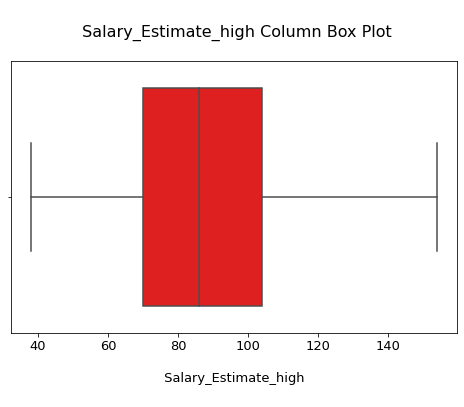

In [ ]:
##### 删除异常值 ######
not_outlier = df_da.Salary_Estimate_high[(df_da.Salary_Estimate_high > lower_whisker) & (df_da.Salary_Estimate_high < upper_whisker)]
not_outlier_high_da=not_outlier
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_high_da,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_da.Salary_Estimate_high,0.25)
q3=np.quantile(df_da.Salary_Estimate_high,0.75)
q2=np.median(df_da.Salary_Estimate_high)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3


(70.0, 86.0, 106.0)

In [ ]:
salary=["Salary_Estimate_average"]
df_da.groupby("Job Title final")[salary].mean().sort_values("Salary_Estimate_average",ascending=False)

,Salary_Estimate_average
Job Title final,
Data Analyst,72.41939


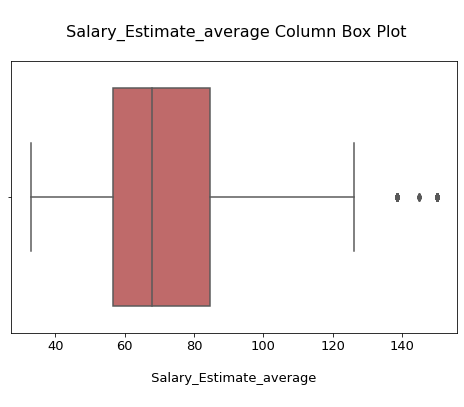

In [ ]:
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_da.Salary_Estimate_average,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 126.0
下边缘： 33.0
非异常范围： [33.0, 126.0]
异常值（离散值）： 1468    150.0
1469    150.0
1470    150.0
1471    150.0
1472    150.0
        ...  
2496    145.0
4435    138.5
4436    138.5
4437    138.5
4438    138.5
Name: Salary_Estimate_average, Length: 77, dtype: float64


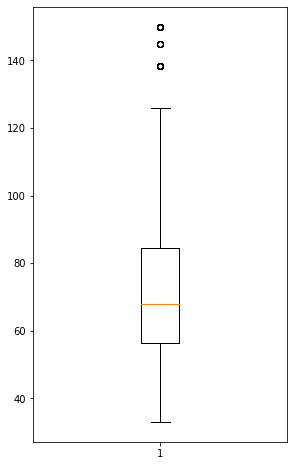

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_da.Salary_Estimate_average)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_da.Salary_Estimate_average[(df_da.Salary_Estimate_average < lower_whisker) | (df_da.Salary_Estimate_average > upper_whisker)]
print("异常值（离散值）：", outlier)

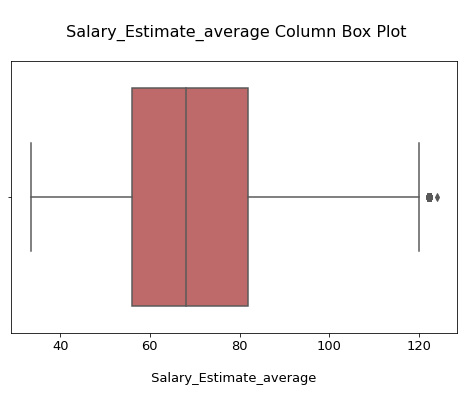

In [ ]:
##### 删除异常值 ######
not_outlier = df_da.Salary_Estimate_average[(df_da.Salary_Estimate_average > lower_whisker) & (df_da.Salary_Estimate_average < upper_whisker)]
not_outlier_average_da=not_outlier
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_average_da,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_da.Salary_Estimate_average,0.25)
q3=np.quantile(df_da.Salary_Estimate_average,0.75)
q2=np.median(df_da.Salary_Estimate_average)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(56.5, 68.0, 84.5)

##Data Engineer part

In [ ]:
salary_min=["Salary_Estimate_low"]
df_de.groupby("Job Title final")[salary_min].mean().sort_values("Salary_Estimate_low",ascending=False)

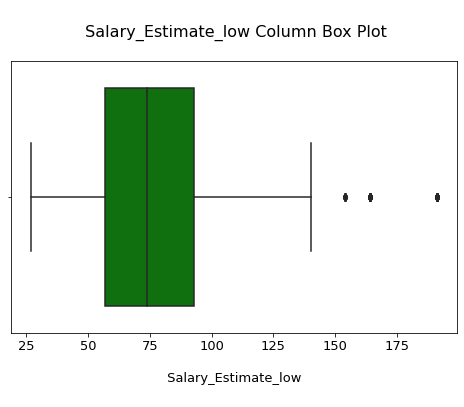

In [ ]:
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_de.Salary_Estimate_low,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 140.0
下边缘： 27.0
非异常范围： [27.0, 140.0]
异常值（离散值）： 6804    154
6805    154
6806    154
6807    154
6808    154
       ... 
7475    164
7476    164
7477    164
7478    164
7479    164
Name: Salary_Estimate_low, Length: 76, dtype: int64


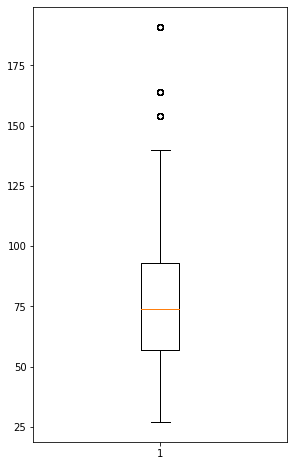

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_de.Salary_Estimate_low)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_de.Salary_Estimate_low[(df_de.Salary_Estimate_low < lower_whisker) | (df_de.Salary_Estimate_low > upper_whisker)]
print("异常值（离散值）：", outlier)

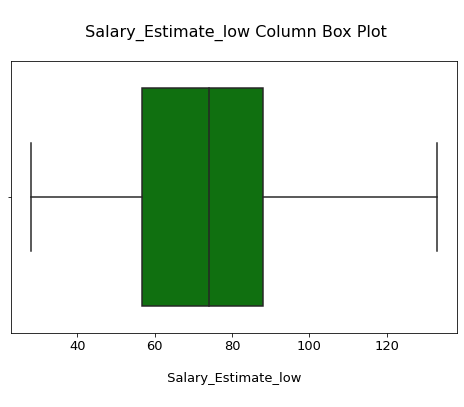

In [ ]:
##### 删除异常值 ######
not_outlier = df_de.Salary_Estimate_low[(df_de.Salary_Estimate_low > lower_whisker) & (df_de.Salary_Estimate_low < upper_whisker)]
not_outlier_low_de=not_outlier
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_low_de,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_de.Salary_Estimate_low,0.25)
q3=np.quantile(df_de.Salary_Estimate_low,0.75)
q2=np.median(df_de.Salary_Estimate_low)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(57.0, 74.0, 93.0)

In [ ]:
salary_max=["Salary_Estimate_high"]
df_de.groupby("Job Title final")[salary_max].mean().sort_values("Salary_Estimate_high",ascending=False)

,Salary_Estimate_high
Job Title final,
Data Engineer,124.405063


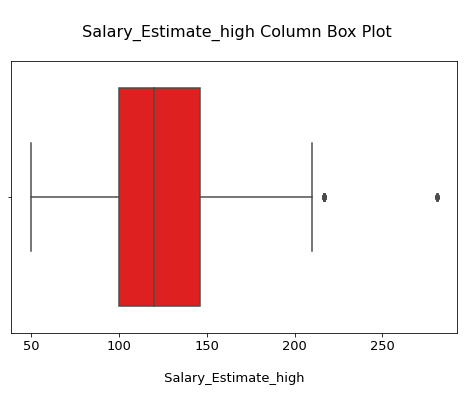

In [ ]:
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_de.Salary_Estimate_high,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 210.0
下边缘： 50.0
非异常范围： [50.0, 210.0]
异常值（离散值）： 6804    281.0
6805    281.0
6806    281.0
6807    281.0
6808    281.0
6809    281.0
6810    281.0
6811    281.0
6812    281.0
6813    281.0
6814    281.0
6815    281.0
6816    281.0
6817    281.0
7139    217.0
7140    217.0
7141    217.0
7142    217.0
7143    217.0
7144    217.0
7145    217.0
7146    217.0
7147    217.0
7148    217.0
7149    217.0
7150    217.0
7151    217.0
7152    217.0
7153    217.0
7154    217.0
7155    217.0
7156    217.0
7157    217.0
7158    217.0
7159    217.0
7160    217.0
7161    217.0
7162    217.0
7163    217.0
7164    217.0
7165    217.0
7166    217.0
7167    217.0
7168    217.0
Name: Salary_Estimate_high, dtype: float64


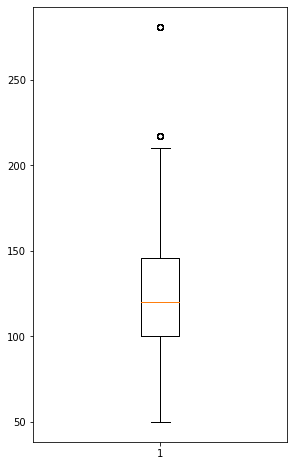

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_de.Salary_Estimate_high)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_de.Salary_Estimate_high[(df_de.Salary_Estimate_high < lower_whisker) | (df_de.Salary_Estimate_high > upper_whisker)]
print("异常值（离散值）：", outlier)

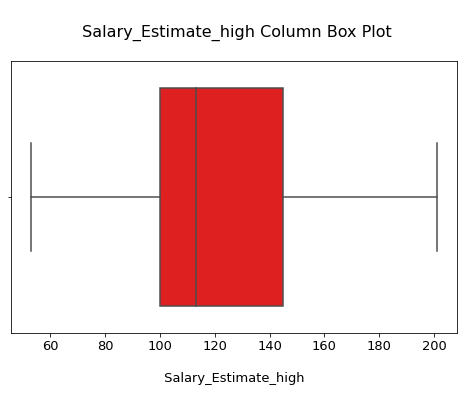

In [ ]:
##### 删除异常值 ######
not_outlier = df_de.Salary_Estimate_high[(df_de.Salary_Estimate_high > lower_whisker) & (df_de.Salary_Estimate_high < upper_whisker)]
not_outlier_high_de=not_outlier
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_high_de,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_de.Salary_Estimate_high,0.25)
q3=np.quantile(df_de.Salary_Estimate_high,0.75)
q2=np.median(df_de.Salary_Estimate_high)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(100.0, 120.0, 146.0)

In [ ]:
salary=["Salary_Estimate_average"]
df_de.groupby("Job Title final")[salary].mean().sort_values("Salary_Estimate_average",ascending=False)

,Salary_Estimate_average
Job Title final,
Data Engineer,100.800435


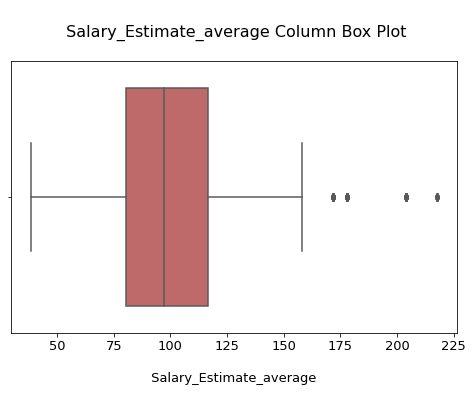

In [ ]:
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_de.Salary_Estimate_average,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 158.0
下边缘： 38.5
非异常范围： [38.5, 158.0]
异常值（离散值）： 6080    171.5
6081    171.5
6082    171.5
6083    171.5
6084    171.5
        ...  
7475    178.0
7476    178.0
7477    178.0
7478    178.0
7479    178.0
Name: Salary_Estimate_average, Length: 108, dtype: float64


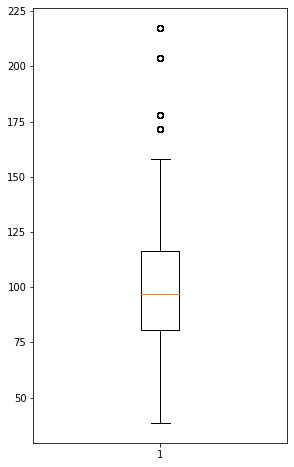

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_de.Salary_Estimate_average)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_de.Salary_Estimate_average[(df_de.Salary_Estimate_average < lower_whisker) | (df_de.Salary_Estimate_average > upper_whisker)]
print("异常值（离散值）：", outlier)

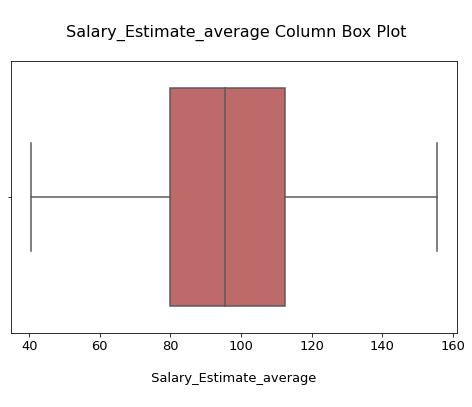

In [ ]:
##### 删除异常值 ######
not_outlier = df_de.Salary_Estimate_average[(df_de.Salary_Estimate_average > lower_whisker) & (df_de.Salary_Estimate_average < upper_whisker)]
not_outlier_average_de=not_outlier
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_average_de,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_de.Salary_Estimate_average,0.25)
q3=np.quantile(df_de.Salary_Estimate_average,0.75)
q2=np.median(df_de.Salary_Estimate_average)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(80.5, 97.0, 116.5)

##Business Analyst part

In [ ]:
salary_min=["Salary_Estimate_low"]
df_ba.groupby("Job Title final")[salary_min].mean().sort_values("Salary_Estimate_low",ascending=False)

,Salary_Estimate_low
Job Title final,
Business Analyst,56.243499


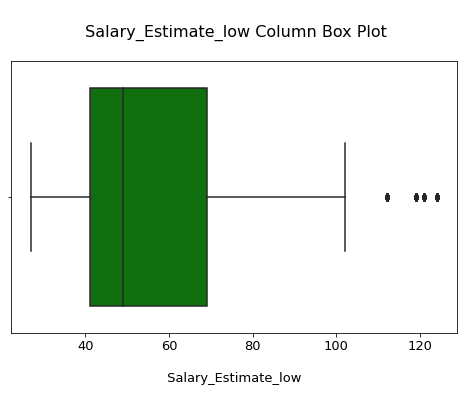

In [ ]:
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ba.Salary_Estimate_low,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 102.0
下边缘： 27.0
非异常范围： [27.0, 102.0]
异常值（离散值）： 12504    124
12505    124
12506    124
12507    124
12508    124
        ... 
15264    119
15265    119
15266    119
15267    119
15268    119
Name: Salary_Estimate_low, Length: 111, dtype: int64


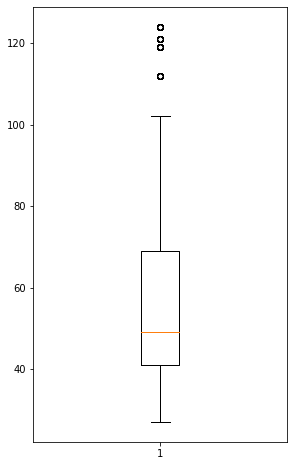

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ba.Salary_Estimate_low)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ba.Salary_Estimate_low[(df_ba.Salary_Estimate_low < lower_whisker) | (df_ba.Salary_Estimate_low > upper_whisker)]
print("异常值（离散值）：", outlier)

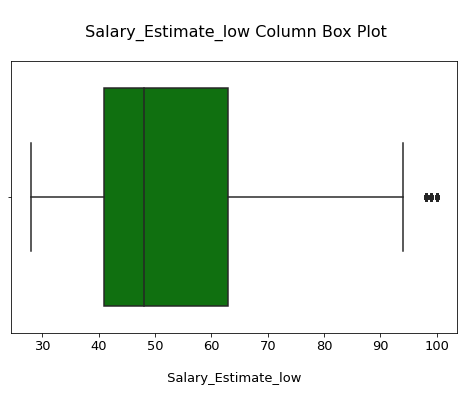

In [ ]:
##### 删除异常值 ######
not_outlier = df_ba.Salary_Estimate_low[(df_ba.Salary_Estimate_low > lower_whisker) & (df_ba.Salary_Estimate_low < upper_whisker)]
not_outlier_low_ba=not_outlier
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_low_ba,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ba.Salary_Estimate_low,0.25)
q3=np.quantile(df_ba.Salary_Estimate_low,0.75)
q2=np.median(df_ba.Salary_Estimate_low)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(41.0, 49.0, 69.0)

In [ ]:
salary_max=["Salary_Estimate_high"]
df_ba.groupby("Job Title final")[salary_max].mean().sort_values("Salary_Estimate_high",ascending=False)

,Salary_Estimate_high
Job Title final,
Business Analyst,98.980228


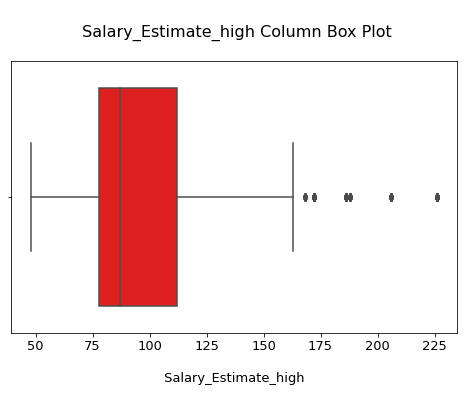

In [ ]:
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ba.Salary_Estimate_high,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 163.0
下边缘： 48.0
非异常范围： [48.0, 163.0]
异常值（离散值）： 12504    186.0
12505    186.0
12506    186.0
12507    186.0
12508    186.0
         ...  
15264    226.0
15265    226.0
15266    226.0
15267    226.0
15268    226.0
Name: Salary_Estimate_high, Length: 175, dtype: float64


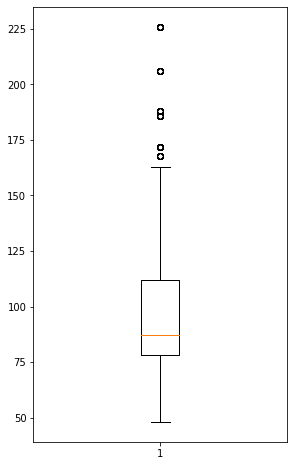

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ba.Salary_Estimate_high)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ba.Salary_Estimate_high[(df_ba.Salary_Estimate_high < lower_whisker) | (df_ba.Salary_Estimate_high > upper_whisker)]
print("异常值（离散值）：", outlier)

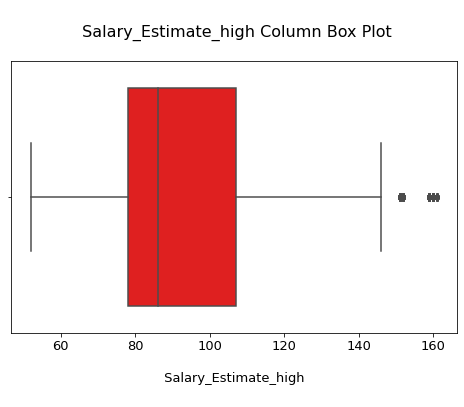

In [ ]:
##### 删除异常值 ######
not_outlier = df_ba.Salary_Estimate_high[(df_ba.Salary_Estimate_high > lower_whisker) & (df_ba.Salary_Estimate_high < upper_whisker)]
not_outlier_high_ba=not_outlier
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_high_ba,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ba.Salary_Estimate_high,0.25)
q3=np.quantile(df_ba.Salary_Estimate_high,0.75)
q2=np.median(df_ba.Salary_Estimate_high)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(78.0, 87.0, 112.0)

In [ ]:
salary=["Salary_Estimate_average"]
df_ba.groupby("Job Title final")[salary].mean().sort_values("Salary_Estimate_average",ascending=False)

,Salary_Estimate_average
Job Title final,
Business Analyst,77.611863


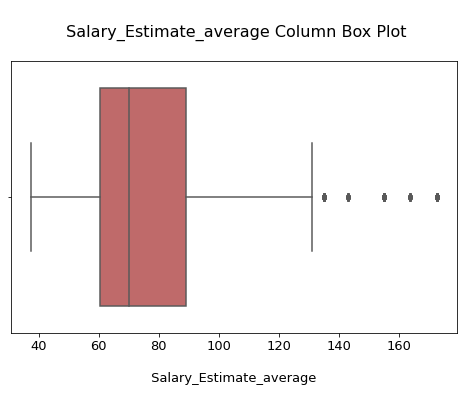

In [ ]:
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ba.Salary_Estimate_average,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 131.0
下边缘： 37.5
非异常范围： [37.5, 131.0]
异常值（离散值）： 12504    155.0
12505    155.0
12506    155.0
12507    155.0
12508    155.0
         ...  
15264    172.5
15265    172.5
15266    172.5
15267    172.5
15268    172.5
Name: Salary_Estimate_average, Length: 130, dtype: float64


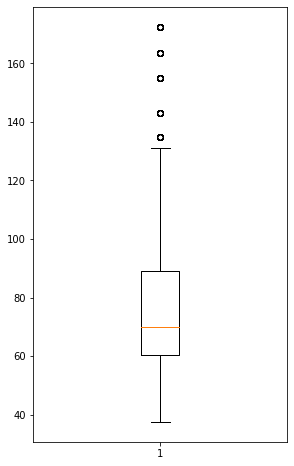

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ba.Salary_Estimate_average)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ba.Salary_Estimate_average[(df_ba.Salary_Estimate_average < lower_whisker) | (df_ba.Salary_Estimate_average > upper_whisker)]
print("异常值（离散值）：", outlier)

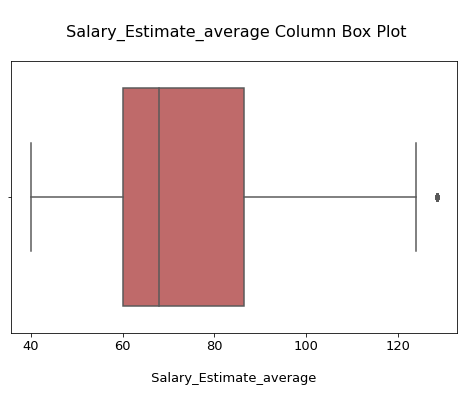

In [ ]:
##### 删除异常值 ######
not_outlier = df_ba.Salary_Estimate_average[(df_ba.Salary_Estimate_average > lower_whisker) & (df_ba.Salary_Estimate_average < upper_whisker)]
not_outlier_average_ba=not_outlier
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_average_ba,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ba.Salary_Estimate_average,0.25)
q3=np.quantile(df_ba.Salary_Estimate_average,0.75)
q2=np.median(df_ba.Salary_Estimate_average)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(60.5, 70.0, 89.0)

##Data Scientist part

In [ ]:
salary_min=["Salary_Estimate_low"]
df_ds.groupby("Job Title final")[salary_min].mean().sort_values("Salary_Estimate_low",ascending=False)

,Salary_Estimate_low
Job Title final,
Data Scientist,82.235854


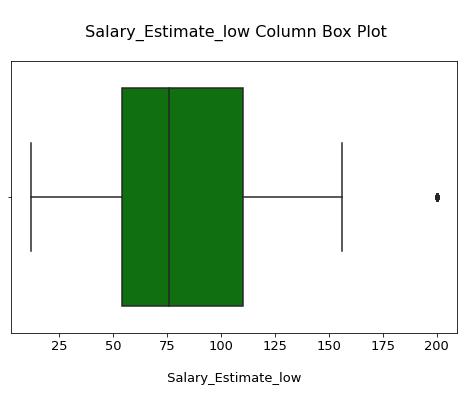

In [ ]:
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ds.Salary_Estimate_low,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 156.0
下边缘： 12.0
非异常范围： [12.0, 156.0]
异常值（离散值）： 11105    200
11106    200
11107    200
11108    200
11109    200
11110    200
11111    200
11112    200
11113    200
11114    200
11115    200
11116    200
11117    200
11118    200
11119    200
11120    200
11121    200
11122    200
11123    200
11124    200
11125    200
11126    200
11127    200
11128    200
11129    200
11130    200
11131    200
11132    200
11133    200
Name: Salary_Estimate_low, dtype: int64


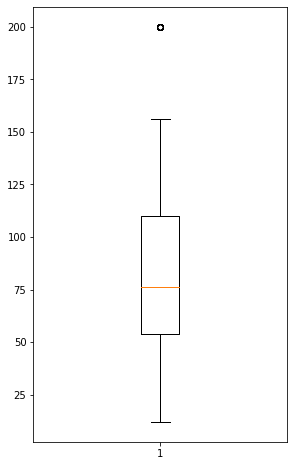

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ds.Salary_Estimate_low)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ds.Salary_Estimate_low[(df_ds.Salary_Estimate_low < lower_whisker) | (df_ds.Salary_Estimate_low > upper_whisker)]
print("异常值（离散值）：", outlier)

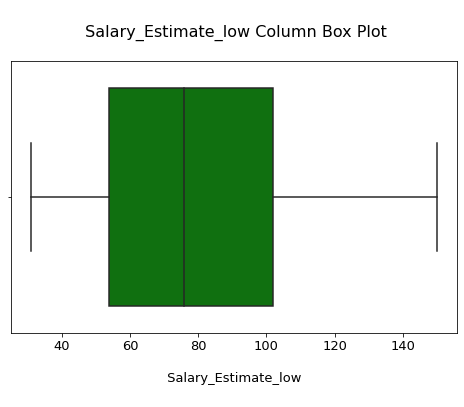

In [ ]:
##### 删除异常值 ######
not_outlier = df_ds.Salary_Estimate_low[(df_ds.Salary_Estimate_low > lower_whisker) & (df_ds.Salary_Estimate_low < upper_whisker)]
not_outlier_low_ds=not_outlier
# To see any outliers in the 'Salary_Estimate_low' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_low_ds,color="green")
plt.title('\n Salary_Estimate_low Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_low \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ds.Salary_Estimate_low,0.25)
q3=np.quantile(df_ds.Salary_Estimate_low,0.75)
q2=np.median(df_ds.Salary_Estimate_low)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(54.0, 76.0, 110.0)

In [ ]:
salary_max=["Salary_Estimate_high"]
df_ds.groupby("Job Title final")[salary_max].mean().sort_values("Salary_Estimate_high",ascending=False)

,Salary_Estimate_high
Job Title final,
Data Scientist,134.355967


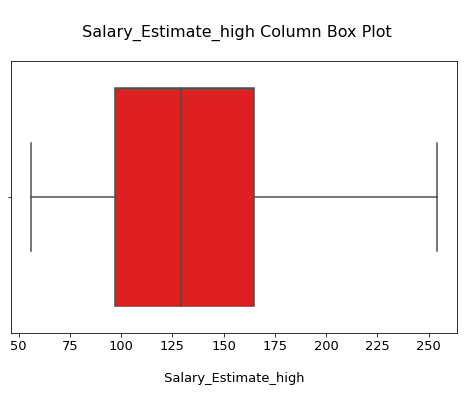

In [ ]:
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ds.Salary_Estimate_high,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 254.0
下边缘： 56.0
非异常范围： [56.0, 254.0]
异常值（离散值）： Series([], Name: Salary_Estimate_high, dtype: float64)


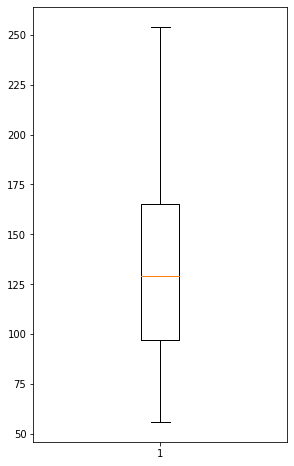

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ds.Salary_Estimate_high)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ds.Salary_Estimate_high[(df_ds.Salary_Estimate_high < lower_whisker) | (df_ds.Salary_Estimate_high > upper_whisker)]
print("异常值（离散值）：", outlier)

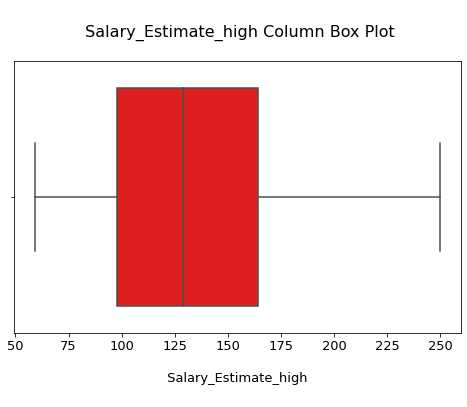

In [ ]:
##### 删除异常值 ######
not_outlier = df_ds.Salary_Estimate_high[(df_ds.Salary_Estimate_high > lower_whisker) & (df_ds.Salary_Estimate_high < upper_whisker)]
not_outlier_high_ds=not_outlier
# To see any outliers in the 'Salary_Estimate_high' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_high_ds,color="red")
plt.title('\n Salary_Estimate_high Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_high \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ds.Salary_Estimate_high,0.25)
q3=np.quantile(df_ds.Salary_Estimate_high,0.75)
q2=np.median(df_ds.Salary_Estimate_high)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(97.0, 129.0, 165.0)

In [ ]:
salary=["Salary_Estimate_average"]
df_ds.groupby("Job Title final")[salary].mean().sort_values("Salary_Estimate_average",ascending=False)

,Salary_Estimate_average
Job Title final,
Data Scientist,108.29591


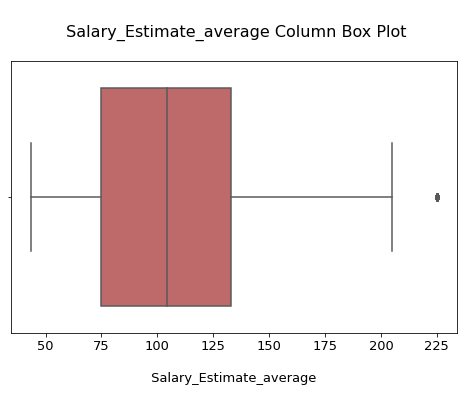

In [ ]:
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(df_ds.Salary_Estimate_average,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

上边缘： 205.0
下边缘： 43.5
非异常范围： [43.5, 205.0]
异常值（离散值）： 11105    225.0
11106    225.0
11107    225.0
11108    225.0
11109    225.0
11110    225.0
11111    225.0
11112    225.0
11113    225.0
11114    225.0
11115    225.0
11116    225.0
11117    225.0
11118    225.0
11119    225.0
11120    225.0
11121    225.0
11122    225.0
11123    225.0
11124    225.0
11125    225.0
11126    225.0
11127    225.0
11128    225.0
11129    225.0
11130    225.0
11131    225.0
11132    225.0
11133    225.0
Name: Salary_Estimate_average, dtype: float64


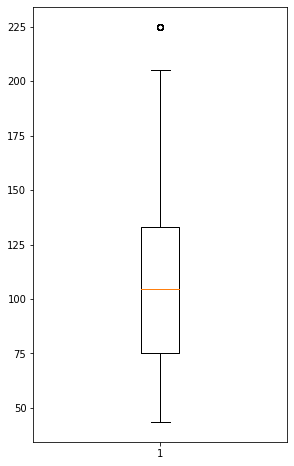

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,2,1)
bp = ax1.boxplot(df_ds.Salary_Estimate_average)

lower_whisker = [item.get_ydata()[1] for item in bp['whiskers']][0]
upper_whisker = [item.get_ydata()[1] for item in bp['whiskers']][1]
print("上边缘：", upper_whisker)
print("下边缘：", lower_whisker)
print("非异常范围：", [lower_whisker,upper_whisker])

##### 寻找异常值 #####
outlier = df_ds.Salary_Estimate_average[(df_ds.Salary_Estimate_average < lower_whisker) | (df_ds.Salary_Estimate_average > upper_whisker)]
print("异常值（离散值）：", outlier)

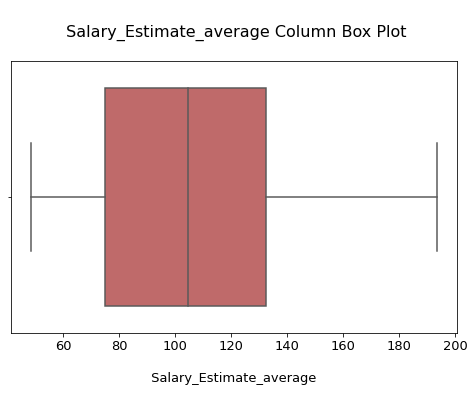

In [ ]:
##### 删除异常值 ######
not_outlier = df_ds.Salary_Estimate_average[(df_ds.Salary_Estimate_average > lower_whisker) & (df_ds.Salary_Estimate_average < upper_whisker)]
not_outlier_average_ds=not_outlier
# To see any outliers in the 'Salary_Estimate_average' column.

plt.figure(figsize=(8,5))
sns.boxplot(not_outlier_average_ds,color="indianred")
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n Salary_Estimate_average \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
q1=np.quantile(df_ds.Salary_Estimate_average,0.25)
q3=np.quantile(df_ds.Salary_Estimate_average,0.75)
q2=np.median(df_ds.Salary_Estimate_average)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
q1,q2,q3

(75.0, 104.5, 133.0)

In [ ]:
# from google.colab import files
# files.download('df_ds_new')